### Do mountaineers die younger?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wikipedia
import wikipediaapi

%matplotlib inline  



In [2]:
article_name = "List of climbers and mountaineers"

# initialize wiki page
wiki_wiki = wikipediaapi.Wikipedia('en')
mountaineers = wiki_wiki.page(article_name)

#get only the text data
mountaineers = mountaineers.text

In [3]:
print("Type is: ", type(mountaineers))
print("Number of letters: ", len(mountaineers))

Type is:  <class 'str'>
Number of letters:  48687


In [4]:
mountaineers = mountaineers.split("\n")

In [34]:
mountaineers = mountaineers[3:]
mountaineers[:10]

['Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2',
 'Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains',
 'Pat Ament (born 1946) US, rock climber and pioneer boulderer',
 'Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc',
 "Conrad Anker (born 1963) US, discovered Mallory's body on Everest in 1999",
 'Tyler Armstrong (born 2004) US, in 2013, at age 9, the youngest to climb Aconcagua',
 'Melissa Arnot (born 1983) US, six ascents of Everest',
 'Bernd Arnold (born 1947) Germany, more than 900 first ascents in Saxon Switzerland',
 'Armando Aste (born 1926) Italy, first Italian ascent of Eiger north face',
 'Peter Athans (born 1957) US, seven ascents of Mount Everest']

In [6]:
df = pd.DataFrame(mountaineers)
df.head()

,0
0,"Vitaly Abalakov (1906–1992) Russia, climbed Le..."
1,"Yevgeniy Abalakov (1907–1948) Russia, climbed ..."
2,"Premlata Agarwal (born 1963) India, first Indi..."
3,"H. P. S. Ahluwalia (fl. 1965) India, climbed M..."
4,"Pierre Allain (1904–2000) France, championed b..."


In [7]:
df.drop(df.tail(7).index,inplace=True) # drop last n rows
df.tail(10)


,0
566,Z
567,Mariusz Zaruski
568,"Andrzej Zawada (1928–2000) Poland, pioneer of ..."
569,"Li Zhixin (born 1962) China, half of first Chi..."
570,"Emil Zsigmondy (1861–1885) Austria, physician ..."
571,Jerzy Żuławski (1874–1915) Polish literary fig...
572,"Juliusz Żuławski (1910–1999) Polish poet, pros..."
573,"Marek Żuławski (1908–1985) Polish painter, gra..."
574,Wawrzyniec Żuławski (1916–1957) Polish compose...
575,"Matthias Zurbriggen (1856–1917) Switzerland, f..."


In [8]:
df = df[0].str.split("(",n=1,expand=True)
df = df.rename(columns={0: "Name"})

In [9]:
df[["Year","Rest"]] = df[1].str.split(")",n=1,expand=True)
df = df.drop(1,axis=1)
df


,Name,Year,Rest
0,Vitaly Abalakov,1906–1992,"Russia, climbed Lenin Peak (1934) and Khan Te..."
1,Yevgeniy Abalakov,1907–1948,"Russia, climbed Communism Peak (1933)"
2,Premlata Agarwal,born 1963,"India, first Indian woman to complete all Sev..."
3,H. P. S. Ahluwalia,fl. 1965,"India, climbed Mount Everest in 1965"
4,Pierre Allain,1904–2000,"France, championed bouldering at Fontaineblea..."
...,...,...,...
571,Jerzy Żuławski,1874–1915,"Polish literary figure, philosopher, translat..."
572,Juliusz Żuławski,1910–1999,"Polish poet, prose writer, literary critic, t..."
573,Marek Żuławski,1908–1985,"Polish painter, graphic artist, author and cl..."
574,Wawrzyniec Żuławski,1916–1957,"Polish composer, music critic and teacher; di..."


In [10]:
df[["Born","Died"]] = df["Year"].str.split("–",n=1,expand=True)
df = df.drop("Year",axis=1)
df


,Name,Rest,Born,Died
0,Vitaly Abalakov,"Russia, climbed Lenin Peak (1934) and Khan Te...",1906,1992
1,Yevgeniy Abalakov,"Russia, climbed Communism Peak (1933)",1907,1948
2,Premlata Agarwal,"India, first Indian woman to complete all Sev...",born 1963,None
3,H. P. S. Ahluwalia,"India, climbed Mount Everest in 1965",fl. 1965,None
4,Pierre Allain,"France, championed bouldering at Fontaineblea...",1904,2000
...,...,...,...,...
571,Jerzy Żuławski,"Polish literary figure, philosopher, translat...",1874,1915
572,Juliusz Żuławski,"Polish poet, prose writer, literary critic, t...",1910,1999
573,Marek Żuławski,"Polish painter, graphic artist, author and cl...",1908,1985
574,Wawrzyniec Żuławski,"Polish composer, music critic and teacher; di...",1916,1957


In [11]:
Country = df["Rest"].str.split(n=1,expand=True)
Country = Country
Country

,0,1
0,"Russia,",climbed Lenin Peak (1934) and Khan Tengri (1936)
1,"Russia,",climbed Communism Peak (1933)
2,"India,",first Indian woman to complete all Seven Summits
3,"India,",climbed Mount Everest in 1965
4,"France,","championed bouldering at Fontainebleau, and in..."
...,...,...
571,Polish,"literary figure, philosopher, translator and a..."
572,Polish,"poet, prose writer, literary critic, translato..."
573,Polish,"painter, graphic artist, author and climber; s..."
574,Polish,"composer, music critic and teacher; died durin..."


In [12]:
Country = Country[0].str.strip(",")
Country


0           Russia
1           Russia
2            India
3            India
4           France
          ...     
571         Polish
572         Polish
573         Polish
574         Polish
575    Switzerland
Name: 0, Length: 576, dtype: object

In [13]:
df["Country"] = Country
df = df.drop("Rest",axis=1)
df

,Name,Born,Died,Country
0,Vitaly Abalakov,1906,1992,Russia
1,Yevgeniy Abalakov,1907,1948,Russia
2,Premlata Agarwal,born 1963,None,India
3,H. P. S. Ahluwalia,fl. 1965,None,India
4,Pierre Allain,1904,2000,France
...,...,...,...,...
571,Jerzy Żuławski,1874,1915,Polish
572,Juliusz Żuławski,1910,1999,Polish
573,Marek Żuławski,1908,1985,Polish
574,Wawrzyniec Żuławski,1916,1957,Polish


In [14]:
df['Born'] = df['Born'].str.extract('(\d+)')
df


,Name,Born,Died,Country
0,Vitaly Abalakov,1906,1992,Russia
1,Yevgeniy Abalakov,1907,1948,Russia
2,Premlata Agarwal,1963,None,India
3,H. P. S. Ahluwalia,1965,None,India
4,Pierre Allain,1904,2000,France
...,...,...,...,...
571,Jerzy Żuławski,1874,1915,Polish
572,Juliusz Żuławski,1910,1999,Polish
573,Marek Żuławski,1908,1985,Polish
574,Wawrzyniec Żuławski,1916,1957,Polish


In [15]:
df = df.fillna(value=np.nan)


In [16]:
df["Born"] = pd.to_numeric(df["Born"])
#here's a married couple in one line with two dates, we ditch them
df = df.drop(29,axis=0)
df.head(30)

,Name,Born,Died,Country
0,Vitaly Abalakov,1906.0,1992,Russia
1,Yevgeniy Abalakov,1907.0,1948,Russia
2,Premlata Agarwal,1963.0,NaN,India
3,H. P. S. Ahluwalia,1965.0,NaN,India
4,Pierre Allain,1904.0,2000,France
5,Christian Almer,1826.0,1898,Switzerland
6,Ashraf Aman,1943.0,NaN,Pakistan
7,"Luigi Amedeo, Duke of Abruzzi",1873.0,1933,Italy
8,Pat Ament,1946.0,NaN,US
9,Melchior Anderegg,1827.0,1912,Switzerland


In [17]:
df = df[df["Born"].notna()]
df["Died"] = pd.to_numeric(df["Died"])
df["Age"] = df["Died"] - df["Born"]
df


,Name,Born,Died,Country,Age
0,Vitaly Abalakov,1906.0,1992.0,Russia,86.0
1,Yevgeniy Abalakov,1907.0,1948.0,Russia,41.0
2,Premlata Agarwal,1963.0,NaN,India,NaN
3,H. P. S. Ahluwalia,1965.0,NaN,India,NaN
4,Pierre Allain,1904.0,2000.0,France,96.0
...,...,...,...,...,...
571,Jerzy Żuławski,1874.0,1915.0,Polish,41.0
572,Juliusz Żuławski,1910.0,1999.0,Polish,89.0
573,Marek Żuławski,1908.0,1985.0,Polish,77.0
574,Wawrzyniec Żuławski,1916.0,1957.0,Polish,41.0


In [18]:
df["Alive"] = np.where(df['Age'].notna(), "Dead", "Alive")
df


,Name,Born,Died,Country,Age,Alive
0,Vitaly Abalakov,1906.0,1992.0,Russia,86.0,Dead
1,Yevgeniy Abalakov,1907.0,1948.0,Russia,41.0,Dead
2,Premlata Agarwal,1963.0,NaN,India,NaN,Alive
3,H. P. S. Ahluwalia,1965.0,NaN,India,NaN,Alive
4,Pierre Allain,1904.0,2000.0,France,96.0,Dead
...,...,...,...,...,...,...
571,Jerzy Żuławski,1874.0,1915.0,Polish,41.0,Dead
572,Juliusz Żuławski,1910.0,1999.0,Polish,89.0,Dead
573,Marek Żuławski,1908.0,1985.0,Polish,77.0,Dead
574,Wawrzyniec Żuławski,1916.0,1957.0,Polish,41.0,Dead


In [19]:
replacement_dict = {"Austrian": "Austria", 
                    "Polish": "Poland", 
                    "Duchy": "France", 
                    "": "Unknown", 
                    "FPR": "Croatia", 
                    "Scottish": "UK",
                    "Scotland": "UK", 
                    "New": "New Zealand",
                    "Britain": "UK",
                    "British": "UK",
                    "Germany/Switzerland": "Germany",
                    "Ireland?": "Ireland",
                    "Argentina/US": "Argentinia",
                    "Iranian": "Iran",
                    "Australia/UK": "Australia",
                    "Pakistani": "Pakistan",
                    "Austria/Canada": "Austria",
                    "Austria-Slovenia": "Slovenia",
                    "Czechoslovakia": "Czech Republic",
                    "Scottish-born": "UK",
                    "United": "US",
                    "Sherpa": "Nepal",
                    "Czech": "Czech Republic",
                    "Gilgit-Baltistan": "Pakistan",
                    "American": "US",
                    "Swiss": "Switzerland",
                    "Switzerland/US": "Switzerland",
                    "England/Australia": "Australia",
                    "Czech-Austrian": "Czech Republic",
                    "Canadian": "Canada",
                    "France/Ireland": "France",
                    "German": "Germany",
                    "in": "UK",
                    "a": "Poland",
                    "leader": "UK",
                    "First": "UK",
                    "pioneering": "US",
                    "Basque": "Spain",
                    "US": "United States",
                    "UK": "United Kingdom"
                    }


df = df.replace({'Country': replacement_dict})


In [20]:
# replace country "first" and "South" with country looked up on wikipedia

df.loc[df["Name"] == "Maciej Berbeka ", "Country"] = "Poland"
df.loc[df["Name"] == "Adam Bielecki ", "Country"] = "Poland"
df.loc[df["Name"] == "Klára Poláčková ", "Country"] = "Czech Republic"
df.loc[df["Name"] == "Ludwig Purtscheller ", "Country"] = "Austria"
df.loc[df["Name"] == "Pasang Lhamu Sherpa ", "Country"] = "Nepal"
df.loc[df["Name"] == "Bachendri Pal ", "Country"] = "India"
df.loc[df["Name"] == "Warren J. Harding ", "Country"] = "United States"
df.loc[df["Name"] == "Cathy O'Dowd ", "Country"] = "South Africa"
df.loc[df["Name"] == "Oh Eun-Sun ", "Country"] = "South Korea"
df.loc[df["Name"] == "Young-seok Park ", "Country"] = "South Korea"
df.loc[df["Name"] == "Um Hong-Gil ", "Country"] = "South Korea"
df.loc[df["Name"] == "Sibusiso Vilane ", "Country"] = "South Africa"


In [21]:
df = df[df["Country"].notna()]
print("Total number of climbers:", df.shape[0])

Total number of climbers: 488


In [22]:
df.groupby("Country").size().sort_values(ascending=False)

Country
United States     108
United Kingdom     90
France             34
Austria            21
India              20
Switzerland        20
Poland             19
Italy              18
Canada             16
Germany            16
UK                 13
Australia          12
Nepal              10
Japan               7
Unknown             7
Norway              6
New Zealand         6
Spain               6
Pakistan            5
Czech Republic      4
Turkey              4
US                  3
China               3
Russia              3
Ireland             3
Sweden              3
South Korea         3
Slovenia            2
South Africa        2
Iran                2
Bulgaria            2
Belgium             2
Ukraine             1
Argentinia          1
Macedonia           1
Romania             1
Portugal            1
Mexico              1
Malaysia            1
Lebanon             1
Kazakhstan          1
Jordan              1
Hungary             1
Finland             1
Estonia             1
Ec

<AxesSubplot:xlabel='Alive', ylabel='Count'>

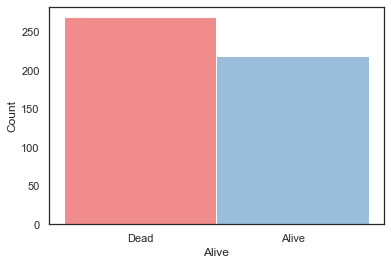

In [95]:
sns.set_theme(style="white", palette="Set1")

sns.histplot(data=df,x="Alive", hue="Alive", legend=False)

In [24]:
df["Born"] = pd.to_numeric(df["Born"],downcast="signed")
df["Died"] = pd.to_numeric(df["Died"],downcast="signed",errors="ignore")

df.loc[df["Born"] == 25, "Born"] = 1946


In [25]:
df.loc[df["Died"].isna(), "Age"] = 2021 - df["Born"]


In [26]:
df

,Name,Born,Died,Country,Age,Alive
0,Vitaly Abalakov,1906,1992.0,Russia,86.0,Dead
1,Yevgeniy Abalakov,1907,1948.0,Russia,41.0,Dead
2,Premlata Agarwal,1963,NaN,India,58.0,Alive
3,H. P. S. Ahluwalia,1965,NaN,India,56.0,Alive
4,Pierre Allain,1904,2000.0,France,96.0,Dead
...,...,...,...,...,...,...
571,Jerzy Żuławski,1874,1915.0,Poland,41.0,Dead
572,Juliusz Żuławski,1910,1999.0,Poland,89.0,Dead
573,Marek Żuławski,1908,1985.0,Poland,77.0,Dead
574,Wawrzyniec Żuławski,1916,1957.0,Poland,41.0,Dead


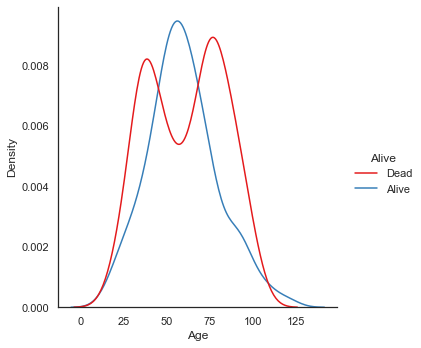

In [36]:
sns.displot(data=df,x="Age",hue="Alive",kind="kde")


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 575
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     488 non-null    object 
 1   Born     488 non-null    int16  
 2   Died     269 non-null    float64
 3   Country  488 non-null    object 
 4   Age      488 non-null    float64
 5   Alive    488 non-null    object 
dtypes: float64(2), int16(1), object(3)
memory usage: 40.0+ KB


In [29]:
dead = df[df["Alive"] == "Dead"]
alive = df[df["Alive"] == "Alive"]


In [30]:
df["Century"] = np.where(df['Born'] < 1900, "before 1900", "after 1900")
df


,Name,Born,Died,Country,Age,Alive,Century
0,Vitaly Abalakov,1906,1992.0,Russia,86.0,Dead,after 1900
1,Yevgeniy Abalakov,1907,1948.0,Russia,41.0,Dead,after 1900
2,Premlata Agarwal,1963,NaN,India,58.0,Alive,after 1900
3,H. P. S. Ahluwalia,1965,NaN,India,56.0,Alive,after 1900
4,Pierre Allain,1904,2000.0,France,96.0,Dead,after 1900
...,...,...,...,...,...,...,...
571,Jerzy Żuławski,1874,1915.0,Poland,41.0,Dead,before 1900
572,Juliusz Żuławski,1910,1999.0,Poland,89.0,Dead,after 1900
573,Marek Żuławski,1908,1985.0,Poland,77.0,Dead,after 1900
574,Wawrzyniec Żuławski,1916,1957.0,Poland,41.0,Dead,after 1900


In [31]:
dead = df[df["Alive"] == "Dead"]
dead

,Name,Born,Died,Country,Age,Alive,Century
0,Vitaly Abalakov,1906,1992.0,Russia,86.0,Dead,after 1900
1,Yevgeniy Abalakov,1907,1948.0,Russia,41.0,Dead,after 1900
4,Pierre Allain,1904,2000.0,France,96.0,Dead,after 1900
5,Christian Almer,1826,1898.0,Switzerland,72.0,Dead,before 1900
7,"Luigi Amedeo, Duke of Abruzzi",1873,1933.0,Italy,60.0,Dead,before 1900
...,...,...,...,...,...,...,...
571,Jerzy Żuławski,1874,1915.0,Poland,41.0,Dead,before 1900
572,Juliusz Żuławski,1910,1999.0,Poland,89.0,Dead,after 1900
573,Marek Żuławski,1908,1985.0,Poland,77.0,Dead,after 1900
574,Wawrzyniec Żuławski,1916,1957.0,Poland,41.0,Dead,after 1900


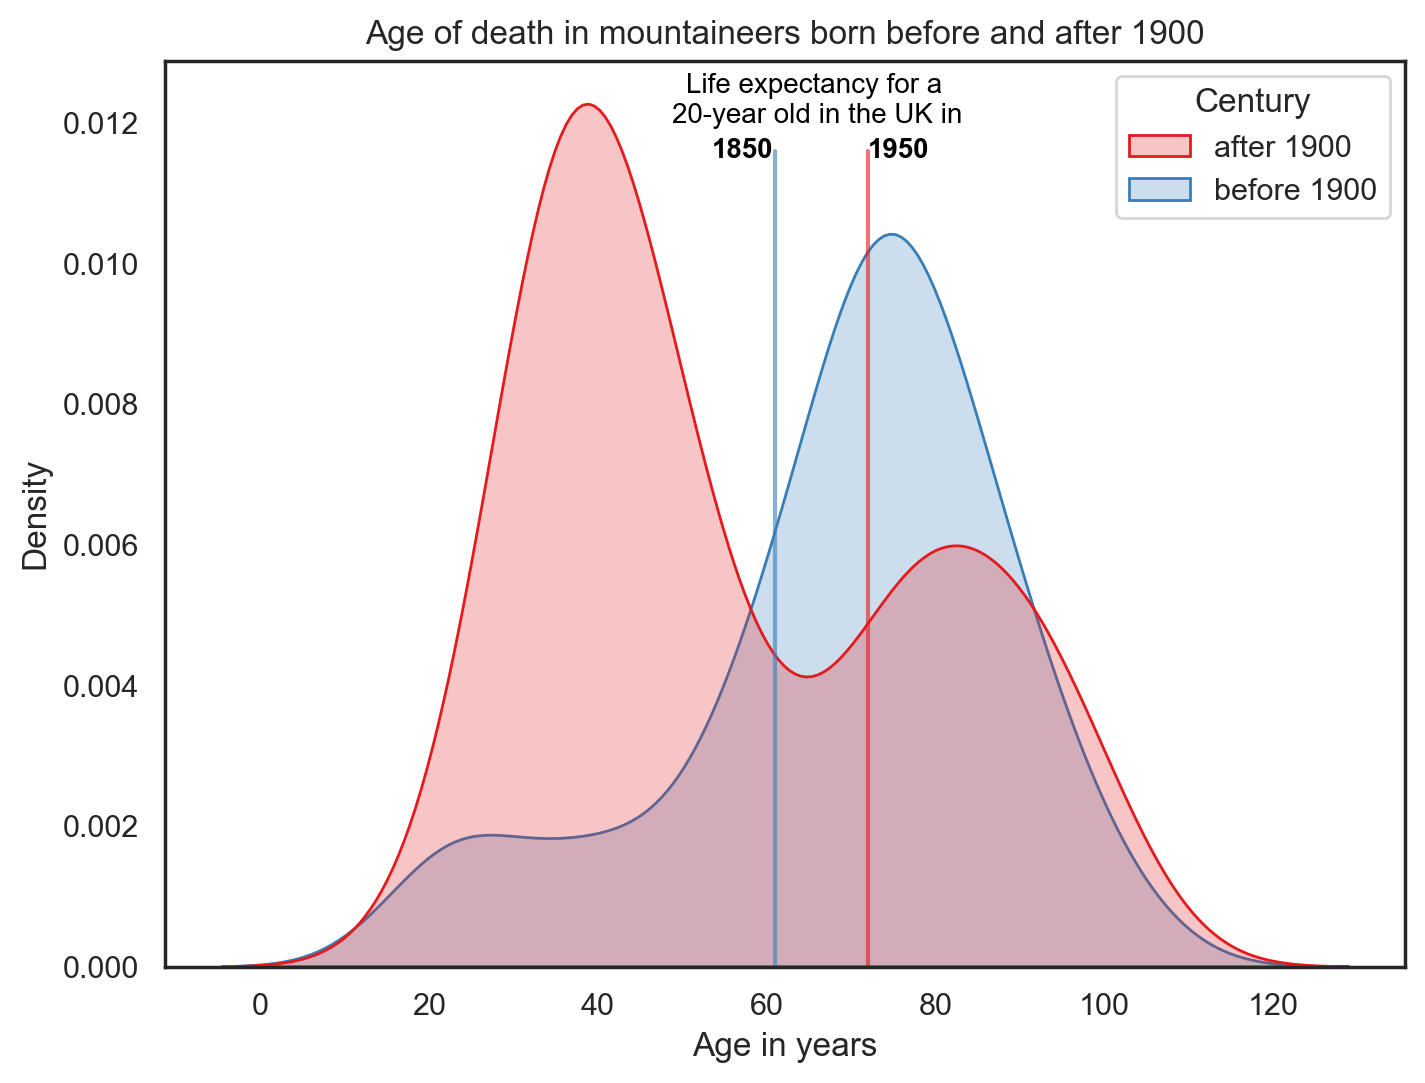

In [121]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=dead,x="Age",hue="Century",fill=True)
plt.xlabel('Age in years')
plt.title('Age of death in mountaineers born before and after 1900')

plt.axvline(61, 0, 0.9,color="#387DB8",alpha=.6) # life expectancy for a 20 year old in the UK 1850 https://ourworldindata.org/life-expectancy
plt.axvline(72, 0, 0.9,color="#E41A1B",alpha=.6) # life expectancy for a 20 year old in the UK 1950

plt.text(66, 0.012 , "Life expectancy for a \n20-year old in the UK in", horizontalalignment='center', size='small', color='black')
plt.text(60.8, 0.0115 , "1850", horizontalalignment='right', size='small', color='black',weight="semibold")
plt.text(72, 0.0115 , "1950", horizontalalignment='left', size='small', color='black',weight="semibold")

plt.savefig("lifeexp.jpg")
